## 分類3層 (mnist)


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  隠れ層のサイズを変更してみよう
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.2643
Generation: 300. 正解率 = 0.4714
Generation: 400. 正解率 = 0.557
Generation: 500. 正解率 = 0.6168
Generation: 600. 正解率 = 0.6725
Generation: 700. 正解率 = 0.698
Generation: 800. 正解率 = 0.738
Generation: 900. 正解率 = 0.7606
Generation: 1000. 正解率 = 0.7755
Generation: 1100. 正解率 = 0.7997
Generation: 1200. 正解率 = 0.8087
Generation: 1300. 正解率 = 0.8323
Generation: 1400. 正解率 = 0.8383
Generation: 1500. 正解率 = 0.8462
Generation: 1600. 正解率 = 0.8526
Generation: 1700. 正解率 = 0.86
Generation: 1800. 正解率 = 0.8662
Generation: 1900. 正解率 = 0.8702
Generation: 2000. 正解率 = 0.8749
Generation: 2100. 正解率 = 0.8779
Generation: 2200. 正解率 = 0.8824
Generation: 2300. 正解率 = 0.8862
Generation: 2400. 正解率 = 0.8912
Generation: 2500. 正解率 = 0.891
Generation: 2600. 正解率 = 0.8926
Generation: 270

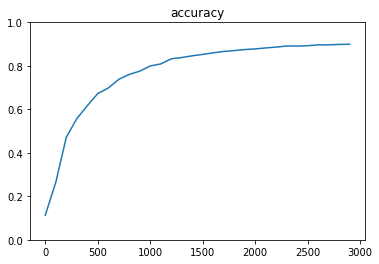

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600  ## original: 600
hidden_layer_size_2 = 300  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
optimizer = tf.train.AdamOptimizer(1e-4)

#optimizer = tf.train.GradientDescentOptimizer(0.3)
#optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
#optimizer = tf.train.AdagradOptimizer(0.1)
#optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try] 隠れ層のサイズを変更してみよう 600,300 -> 1200,600

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.3503
Generation: 200. 正解率 = 0.4003
Generation: 300. 正解率 = 0.5784
Generation: 400. 正解率 = 0.6937
Generation: 500. 正解率 = 0.7425
Generation: 600. 正解率 = 0.786
Generation: 700. 正解率 = 0.8191
Generation: 800. 正解率 = 0.8381
Generation: 900. 正解率 = 0.8514
Generation: 1000. 正解率 = 0.8616
Generation: 1100. 正解率 = 0.8702
Generation: 1200. 正解率 = 0.8767
Generation: 1300. 正解率 = 0.8814
Generation: 1400. 正解率 = 0.8888
Generation: 1500. 正解率 = 0.893
Generation: 1600. 正解率 = 0.8965
Generation: 1700. 正解率 = 0.8977
Generation: 1800. 正解率 = 0.8991
Generation: 1900. 正解率 = 0.9018
Generation: 2000. 正解率 = 0.9041
Generation: 2100. 正解率 = 0.906
Generation: 2200. 正解率 = 0.9075
Generation: 2300. 正解率 = 0.9078
Generation: 2400. 正解率 = 0.9099
Generation: 2500. 正解率 = 0.912
Generation: 2600. 正解率 = 0.9123
Generation: 2

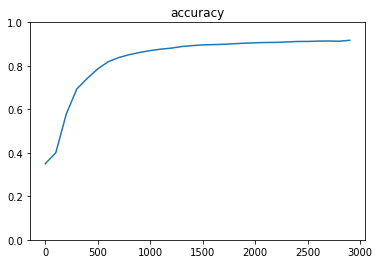

In [13]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 1200  ## original: 600
hidden_layer_size_2 =  600  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
optimizer = tf.train.AdamOptimizer(1e-4)

#optimizer = tf.train.GradientDescentOptimizer(0.3)
#optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
#optimizer = tf.train.AdagradOptimizer(0.1)
#optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try] optimizer変更 : オプティマイザなし(勾配降下法)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.0986
Generation: 200. 正解率 = 0.1135
Generation: 300. 正解率 = 0.101
Generation: 400. 正解率 = 0.1152
Generation: 500. 正解率 = 0.1256
Generation: 600. 正解率 = 0.3136
Generation: 700. 正解率 = 0.3705
Generation: 800. 正解率 = 0.4816
Generation: 900. 正解率 = 0.6432
Generation: 1000. 正解率 = 0.6984
Generation: 1100. 正解率 = 0.7409
Generation: 1200. 正解率 = 0.7716
Generation: 1300. 正解率 = 0.784
Generation: 1400. 正解率 = 0.8093
Generation: 1500. 正解率 = 0.8261
Generation: 1600. 正解率 = 0.8381
Generation: 1700. 正解率 = 0.8438
Generation: 1800. 正解率 = 0.853
Generation: 1900. 正解率 = 0.8613
Generation: 2000. 正解率 = 0.8633
Generation: 2100. 正解率 = 0.8715
Generation: 2200. 正解率 = 0.8742
Generation: 2300. 正解率 = 0.8801
Generation: 2400. 正解率 = 0.8826
Generation: 2500. 正解率 = 0.8881
Generation: 2600. 正解率 = 0.8881
Generation: 

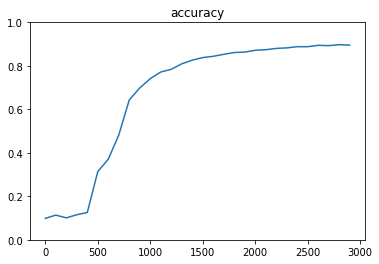

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600  ## original: 600
hidden_layer_size_2 = 300  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
#optimizer = tf.train.AdamOptimizer(1e-4)

optimizer = tf.train.GradientDescentOptimizer(0.3)
#optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
#optimizer = tf.train.AdagradOptimizer(0.1)
#optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try] optimizer変更 : Momentum

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1028
Generation: 200. 正解率 = 0.1816
Generation: 300. 正解率 = 0.5187
Generation: 400. 正解率 = 0.7079
Generation: 500. 正解率 = 0.8303
Generation: 600. 正解率 = 0.8647
Generation: 700. 正解率 = 0.8726
Generation: 800. 正解率 = 0.8953
Generation: 900. 正解率 = 0.8912
Generation: 1000. 正解率 = 0.9009
Generation: 1100. 正解率 = 0.9034
Generation: 1200. 正解率 = 0.9092
Generation: 1300. 正解率 = 0.9084
Generation: 1400. 正解率 = 0.9173
Generation: 1500. 正解率 = 0.9186
Generation: 1600. 正解率 = 0.9238
Generation: 1700. 正解率 = 0.9221
Generation: 1800. 正解率 = 0.9245
Generation: 1900. 正解率 = 0.9258
Generation: 2000. 正解率 = 0.9302
Generation: 2100. 正解率 = 0.9304
Generation: 2200. 正解率 = 0.9373
Generation: 2300. 正解率 = 0.9341
Generation: 2400. 正解率 = 0.9357
Generation: 2500. 正解率 = 0.9394
Generation: 2600. 正解率 = 0.9392
Generatio

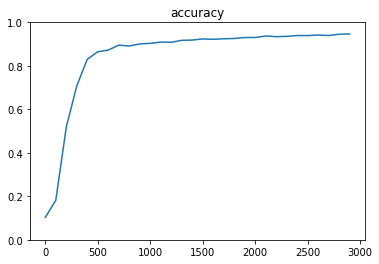

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600  ## original: 600
hidden_layer_size_2 = 300  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
#optimizer = tf.train.AdamOptimizer(1e-4)

#optimizer = tf.train.GradientDescentOptimizer(0.3)
optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
#optimizer = tf.train.AdagradOptimizer(0.1)
#optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try] optimizer変更 : Adagrad

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.098
Generation: 200. 正解率 = 0.0958
Generation: 300. 正解率 = 0.1135
Generation: 400. 正解率 = 0.1191
Generation: 500. 正解率 = 0.1331
Generation: 600. 正解率 = 0.2725
Generation: 700. 正解率 = 0.3757
Generation: 800. 正解率 = 0.4488
Generation: 900. 正解率 = 0.5678
Generation: 1000. 正解率 = 0.6496
Generation: 1100. 正解率 = 0.7154
Generation: 1200. 正解率 = 0.7598
Generation: 1300. 正解率 = 0.7808
Generation: 1400. 正解率 = 0.8023
Generation: 1500. 正解率 = 0.8182
Generation: 1600. 正解率 = 0.8273
Generation: 1700. 正解率 = 0.8327
Generation: 1800. 正解率 = 0.8475
Generation: 1900. 正解率 = 0.8497
Generation: 2000. 正解率 = 0.8603
Generation: 2100. 正解率 = 0.8628
Generation: 2200. 正解率 = 0.8683
Generation: 2300. 正解率 = 0.8695
Generation: 2400. 正解率 = 0.8681
Generation: 2500. 正解率 = 0.8774
Generation: 2600. 正解率 = 0.8845
Generation

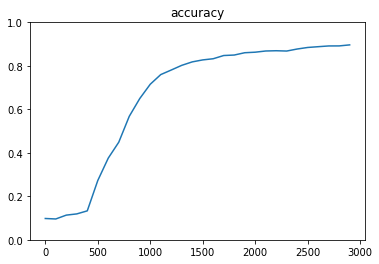

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600  ## original: 600
hidden_layer_size_2 = 300  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
#optimizer = tf.train.AdamOptimizer(1e-4)

#optimizer = tf.train.GradientDescentOptimizer(0.3)
#optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
optimizer = tf.train.AdagradOptimizer(0.1)
#optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try] optimizer変更 : RMSProp

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1028
Generation: 200. 正解率 = 0.1349
Generation: 300. 正解率 = 0.7117
Generation: 400. 正解率 = 0.8393
Generation: 500. 正解率 = 0.8743
Generation: 600. 正解率 = 0.891
Generation: 700. 正解率 = 0.9088
Generation: 800. 正解率 = 0.9133
Generation: 900. 正解率 = 0.9187
Generation: 1000. 正解率 = 0.9249
Generation: 1100. 正解率 = 0.9274
Generation: 1200. 正解率 = 0.9329
Generation: 1300. 正解率 = 0.936
Generation: 1400. 正解率 = 0.9387
Generation: 1500. 正解率 = 0.9397
Generation: 1600. 正解率 = 0.9461
Generation: 1700. 正解率 = 0.9503
Generation: 1800. 正解率 = 0.9521
Generation: 1900. 正解率 = 0.953
Generation: 2000. 正解率 = 0.956
Generation: 2100. 正解率 = 0.9572
Generation: 2200. 正解率 = 0.9587
Generation: 2300. 正解率 = 0.9592
Generation: 2400. 正解率 = 0.9613
Generation: 2500. 正解率 = 0.9619
Generation: 2600. 正解率 = 0.9624
Generation: 2

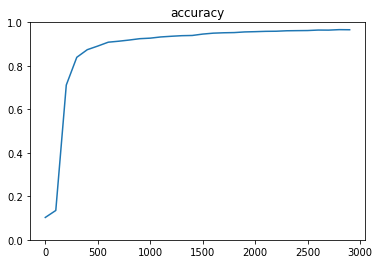

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600  ## original: 600
hidden_layer_size_2 = 300  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
#optimizer = tf.train.AdamOptimizer(1e-4)

#optimizer = tf.train.GradientDescentOptimizer(0.3)
#optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
#optimizer = tf.train.AdagradOptimizer(0.1)
optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try] optimizer変更 : Adam

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.703
Generation: 200. 正解率 = 0.866
Generation: 300. 正解率 = 0.8967
Generation: 400. 正解率 = 0.9102
Generation: 500. 正解率 = 0.9186
Generation: 600. 正解率 = 0.927
Generation: 700. 正解率 = 0.929
Generation: 800. 正解率 = 0.9359
Generation: 900. 正解率 = 0.9405
Generation: 1000. 正解率 = 0.9402
Generation: 1100. 正解率 = 0.9453
Generation: 1200. 正解率 = 0.9504
Generation: 1300. 正解率 = 0.949
Generation: 1400. 正解率 = 0.9531
Generation: 1500. 正解率 = 0.9542
Generation: 1600. 正解率 = 0.9572
Generation: 1700. 正解率 = 0.9573
Generation: 1800. 正解率 = 0.9596
Generation: 1900. 正解率 = 0.9582
Generation: 2000. 正解率 = 0.96
Generation: 2100. 正解率 = 0.9616
Generation: 2200. 正解率 = 0.9631
Generation: 2300. 正解率 = 0.965
Generation: 2400. 正解率 = 0.9667
Generation: 2500. 正解率 = 0.9678
Generation: 2600. 正解率 = 0.9673
Generation: 2700.

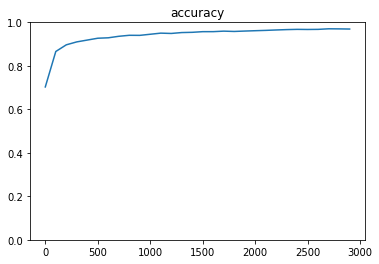

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600  ## original: 600
hidden_layer_size_2 = 300  ## original: 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


## original
#optimizer = tf.train.AdamOptimizer(1e-4)

#optimizer = tf.train.GradientDescentOptimizer(0.3)
#optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
#optimizer = tf.train.AdagradOptimizer(0.1)
#optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            